# Noise PSD Generation

**In the notebook, we demonstrate how to produce noise PSD from continuous data and save in a "filter" file used for the trigger and feature processing**



In [1]:
# import Noise class from detprocess
from detprocess import Noise
from scipy.fftpack import fft, ifft, fftfreq
import numpy as np
import qetpy as qp
from qetpy.core.didv._uncertainties_didv import get_power_noise_with_uncertainties, get_dPdI_with_uncertainties
import pickle
from matplotlib import pyplot as plt
from pytesdaq.io import FilterH5IO

/usr/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib64/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/roger/.local/lib/python3.6/site-packages/paramiko/transport.py:32: CryptographyDeprecationWarning: Python 3.6 is no longer supported by the Python core team. Therefore, support for it is deprecated in cryptography. The next release of cryptography will remove support for Python 3.6.
  from cryptography.hazmat.backends import default_backend
/usr/lib64/python3.6/importlib/_boot

### Instantiate detprocess noise object

In [2]:
noise = Noise(verbose=True)

### Set or generate   random events from continuous data

Three ways of getting random events used to calculate noise PSD:
  1. generate randoms from continuous data
  2. set "randoms" vaex dataframe (produced by the processing or generated by Random object). Vaex dataframe can be either dataframe directly or full path to hdf5 file
  3. set randoms based on a list of events metadata. The list should follow format of detanalys.analyzer.get_event_list() function.

In [3]:
# continuous data directory, use argument "series" for list of series within continuous data directory
continuous_data = '/sdata2/runs/run34/raw/continuous_I2_D20231019_T092835/'

# 1.  Generate randoms
#  use either "random_rate" or nevents
noise.generate_randoms(continuous_data, nevents=1000, ncores=4)

# 2. set randoms from vaex dataframe
#noise.set_randoms(continuous_data, dataframe='/path/to/vaex/hdf5')


INFO: Found total of 81 raw data file(s) from 9 different series number!
INFO: Found total of 81 files from 9 different series number!
INFO: Processing with be split between 4 cores!
INFO node #1: Acquiring randoms for series I2_D20231019_T093439INFO node #4: Acquiring randoms for series I2_D20231019_T123810INFO node #2: Acquiring randoms for series I2_D20231019_T105317INFO node #3: Acquiring randoms for series I2_D20231019_T114543



INFO node #3: Acquiring randoms for series I2_D20231019_T121156
INFO node #2: Acquiring randoms for series I2_D20231019_T111930
INFO node #4: Acquiring randoms for series I2_D20231019_T130423
INFO node #1: Acquiring randoms for series I2_D20231019_T100052
INFO node #1: Acquiring randoms for series I2_D20231019_T102704
INFO: Randoms acquisition done!


### Calculate PSD for each channels

In [4]:
# let's calculate PSD.
# We need to specify trace length and pretrigger length (either in "samples" or "msec") 
# nevents used for calculation can be smaller than the genererate randoms
# a tag can be specified with argument "tag"

noise.calc_psd(['Melange4pc1ch', 'Melange1pc1ch', 'Melange025pcRight'],
                #'Melange025pcLeft+Melange025pcRight'], 
               trace_length_msec=20, 
               pretrigger_length_msec=10,
               nevents=900)

INFO: Processing PSD for channel Melange4pc1ch
Number of events: 900
Nevents before: 900
Nevents after: 900
Memory limit: 4 GB, number of events 900
INFO: 900 events found in raw data for channel(s) Melange4pc1ch
INFO: Number of events after cuts = 455, efficiency = 50.56%
INFO: Processing PSD for channel Melange1pc1ch
Number of events: 900
Nevents before: 900
Nevents after: 900
Memory limit: 4 GB, number of events 900
INFO: 900 events found in raw data for channel(s) Melange1pc1ch
INFO: Number of events after cuts = 306, efficiency = 34.00%
INFO: Processing PSD for channel Melange025pcRight
Number of events: 900
Nevents before: 900
Nevents after: 900
Memory limit: 4 GB, number of events 900
INFO: 900 events found in raw data for channel(s) Melange025pcRight
INFO: Number of events after cuts = 381, efficiency = 42.33%


### Plot PSD(s)

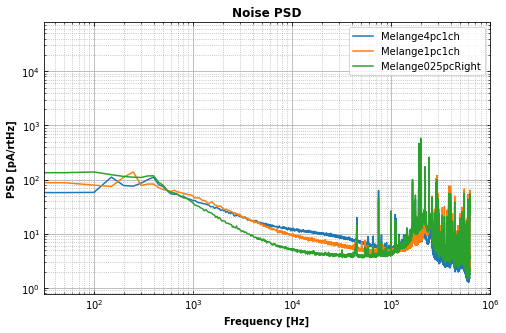

In [5]:
noise.plot_psd(['Melange4pc1ch','Melange1pc1ch', 'Melange025pcRight'], fold=True)
#noise.plot_psd(['Melange4pc1ch','Melange1pc1ch', 'Melange025pcLeft', 'Melange025pcRight',
#                'Melange025pcLeft+Melange025pcRight'], fold=True)

### Save noise filter file

In [6]:
# filter file can be loaded /saved using noise object
# use overwrite=True is psd with same tag already exist
file_name = './r34_101923A_filter2.hdf5'
noise.save_hdf5(file_name, overwrite=True)

INFO: Saving noise data to file ./r34_101923A_filter2.hdf5
INFO: channel data with same tag may be overwritten
Storing /Melange4pc1ch/psd_default in ./r34_101923A_filter2.hdf5
Storing /Melange4pc1ch/psd_fold_default in ./r34_101923A_filter2.hdf5
Storing /Melange1pc1ch/psd_default in ./r34_101923A_filter2.hdf5
Storing /Melange1pc1ch/psd_fold_default in ./r34_101923A_filter2.hdf5
Storing /Melange025pcRight/psd_default in ./r34_101923A_filter2.hdf5
Storing /Melange025pcRight/psd_fold_default in ./r34_101923A_filter2.hdf5


### Load in PhotonCalibration Objects

In [7]:
base_path = '/home/roger/Documents/PYLE_ANALYSIS/RUN_28/'


with open(base_path + "photoncal_4pc_063023", 'rb') as handle:
    cal_4 = pickle.load(handle)
    
with open(base_path + "photoncal_1pc_063023", 'rb') as handle:
    cal_1 = pickle.load(handle)
    
with open(base_path + "photoncal_025pcRight_063023", 'rb') as handle:
    cal_right = pickle.load(handle)
    

base_path = '/home/roger/Documents/PYLE_ANALYSIS/RUN_26/'
    
with open(base_path + "singlecal_right_r26_long1", 'rb') as handle:
    cal_right_single = pickle.load(handle)

### Load in dIdV Objects

In [8]:
base_path = '/sdata2/runs/run34/RQFiles/'


with open(base_path + "didvresults_4_D20231019_T092835", 'rb') as handle:
    didv_4 = pickle.load(handle)
    
with open(base_path + "didvresults_1_D20231019_T092835", 'rb') as handle:
    didv_1 = pickle.load(handle)
    
with open(base_path + "didvresults_right_D20231019_T092835", 'rb') as handle:
    didv_right = pickle.load(handle)

### Calculate and Plot Current Domain Templates
Based on dIdVs and PhotonCalibration power domain templates

Calculating dPdI! This may take some time.


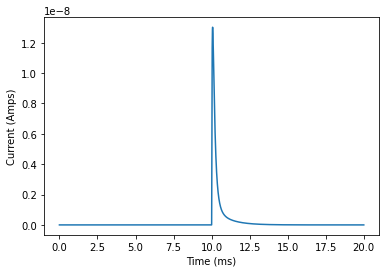

Calculating dPdI! This may take some time.


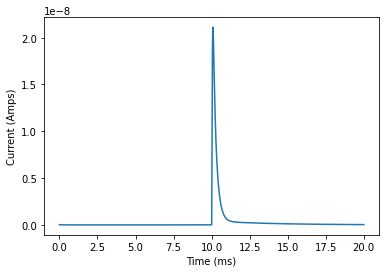

Calculating dPdI! This may take some time.


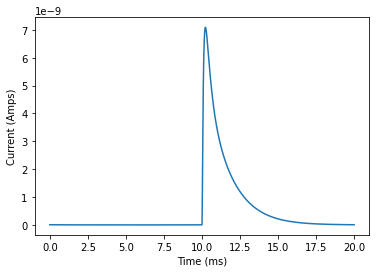

Calculating dPdI! This may take some time.


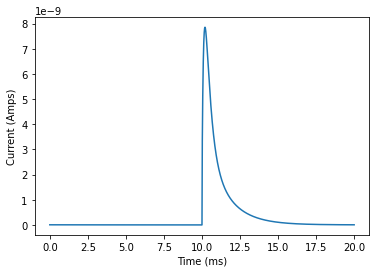

In [9]:
t_arr = np.arange(0, 20e-3, 1/(1.25e6))
start_time = 10e-3

template_4 = cal_4.get_current_template(2, didv_4[0], t_arr, start_time=start_time)
template_1 = cal_1.get_current_template(2, didv_1[0], t_arr, start_time=start_time)
template_right = cal_right.get_current_template(1, didv_right[0], t_arr, start_time=start_time)
template_right_single = cal_right_single.get_current_template(1, didv_right[0], t_arr, start_time=start_time)

### Instantiate detprocess filter object, so we can save the current domain templates

In [10]:
metadata = {'fs':1.25e6, 'trace_length_samples':25000, 'pretrigger_length_samples': 12500}

# instantiate with file name 
myfilter = FilterH5IO(file_name, verbose=True)

In [11]:
# template
myfilter.save_template('Melange4pc1ch', template_4, tag='default', 
                           attributes=metadata, overwrite=True)

# template
myfilter.save_template('Melange1pc1ch', template_1, tag='default', 
                           attributes=metadata, overwrite=True)
    
# single template
myfilter.save_template('Melange025pcRight', template_right, tag='default',
                           attributes=metadata, overwrite=True)

# single template
myfilter.save_template('Melange025pcRight', template_right_single, tag='single',
                           attributes=metadata, overwrite=True)

Storing /Melange4pc1ch/template_default in ./r34_101923A_filter2.hdf5
Storing /Melange1pc1ch/template_default in ./r34_101923A_filter2.hdf5
Storing /Melange025pcRight/template_default in ./r34_101923A_filter2.hdf5
Storing /Melange025pcRight/template_single in ./r34_101923A_filter2.hdf5


### Reload the Noise object, and check to see if what we think is saved is saved

In [12]:
noise.load_hdf5(file_name)
noise.describe()

INFO: Loading filter data from file ./r34_101923A_filter2.hdf5

Channel Melange4pc1ch:
 * Tag "default":
    psd: pandas.Series (25000,)
    psd_fold: pandas.Series (12501,)
    template: pandas.Series (25000,)

Channel Melange1pc1ch:
 * Tag "default":
    psd: pandas.Series (25000,)
    psd_fold: pandas.Series (12501,)
    template: pandas.Series (25000,)

Channel Melange025pcRight:
 * Tag "default":
    psd: pandas.Series (25000,)
    psd_fold: pandas.Series (12501,)
    template: pandas.Series (25000,)
 * Tag "single":
    template: pandas.Series (25000,)
